In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [37]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
cat_num=df[['Credit_History','Dependents','Loan_Amount_Term']]
for i in cat_num:
    df[i]=df[i].fillna(df[i].mode()[0])

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            566 non-null    int64  
 1   Gender             566 non-null    int64  
 2   Married            566 non-null    int64  
 3   Dependents         566 non-null    int64  
 4   Education          566 non-null    int64  
 5   Self_Employed      566 non-null    int64  
 6   ApplicantIncome    566 non-null    int64  
 7   CoapplicantIncome  566 non-null    float64
 8   LoanAmount         566 non-null    float64
 9   Loan_Amount_Term   566 non-null    float64
 10  Credit_History     566 non-null    float64
 11  Property_Area      566 non-null    int64  
 12  Loan_Status        566 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 61.9 KB


In [39]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [40]:
df.dropna(inplace=True)

In [41]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
cat_cols=df.select_dtypes(include='object')
for i in cat_cols:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [43]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [44]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [45]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy_score for logisitic regression:",accuracy_score(y_test,y_pred))

accuracy_score for logisitic regression: 0.8098591549295775


In [49]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy_score for decision tree classifier:",accuracy_score(y_test,y_pred))

accuracy_score for decision tree classifier: 0.8028169014084507


In [50]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("accuracy_score for K-neighbors classifier:",accuracy_score(y_test,y_pred))

accuracy_score for K-neighbors classifier: 0.7746478873239436


In [46]:
base_models=[
    ('lr',LogisticRegression()),
    ('dt',DecisionTreeClassifier(max_depth=3)),
    ('knn',KNeighborsClassifier(n_neighbors=5))
]

classifier=StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

classifier.fit(X_train,y_train)


,estimators,"[('lr', ...), ('dt', ...), ...]"
,final_estimator,LogisticRegression()
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [47]:
y_pred=classifier.predict(X_test)

accuracy_score(y_test,y_pred)

0.8028169014084507

<Axes: >

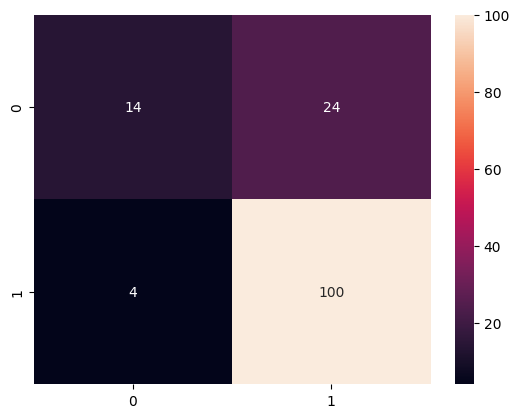

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')